# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

<h1>План урока<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1">Масштабирование признаков</a></span><ul class="toc-item"><li><span><a href="#Нормализация-[0,-1]" data-toc-modified-id="Нормализация-[0,-1]-1.1">Нормализация [0, 1]</a></span></li><li><span><a href="#Стандартизация" data-toc-modified-id="Стандартизация-1.2">Стандартизация</a></span></li></ul></li><li><span><a href="#Стохастический-градиентный-спуск-(Stochastic-Gradient-Descent,-SGD)" data-toc-modified-id="Стохастический-градиентный-спуск-(Stochastic-Gradient-Descent,-SGD)-2">Стохастический градиентный спуск (Stochastic Gradient Descent, SGD)</a></span></li><li><span><a href="#Регуляризация" data-toc-modified-id="Регуляризация-3">Регуляризация</a></span><ul class="toc-item"><li><span><a href="#L1-регуляризация---Lasso" data-toc-modified-id="L1-регуляризация---Lasso-3.1">L1 регуляризация - Lasso</a></span></li><li><span><a href="#L2-регуляризация---Ridge" data-toc-modified-id="L2-регуляризация---Ridge-3.2">L2 регуляризация - Ridge</a></span></li></ul></li><li><span><a href="#Домашние-задания" data-toc-modified-id="Домашние-задания-4">Домашние задания</a></span></li></ul></div>

## Домашние задания

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

2. Модифицировать решение первого задания путем добавления L2 регуляризации и сравнить результаты.  
3. [\*] Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.
4. [\*] Построить график изменения весов от числа итераций при GD и SGD (на одном рисунке).
5. [\*] Построить график изменения весов для L1 и L2 регуляризации от коэффициента регуляризации.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

In [2]:
from sklearn import datasets

X_hw, y_hw, coef_hw = datasets.make_regression(n_samples=100, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err


# Метод градиентного спуска
def eval_GD(X, y, iterations, alpha=1e-4):
    global errors_gd
    errors_gd = []
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        errors_gd.append(err)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

# mini-batch GD & SGD
def eval_SGD(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    global errors_SGD
    errors_SGD = []
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp))
        errors_SGD.append(err)
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [4]:
eval_SGD(X_hw, y_hw, iterations=5000, qty_in_batch=70, alpha=1e-3)

500 [46.36467841 47.3474649 ] 1379.9256388746626
1000 [67.78995082 64.55274527] 251.07871647419913
1500 [77.8472664  70.73899205] 66.47659957000421
2000 [82.58707718 72.93994728] 34.92150011069565
2500 [84.82794986 73.71148825] 29.68686021533674
3000 [85.89005392 73.9762054 ] 29.056758378751873
3500 [86.39446091 74.0641222 ] 29.14099520110618
4000 [86.6343857  74.09181676] 29.26563147541621
4500 [86.74864789 74.0997372 ] 29.34450587276518
5000 [86.80311662 74.10154974] 29.3867712280645


array([86.80311662, 74.10154974])

In [5]:
eval_GD(X_hw, y_hw, iterations=5000, alpha=1e-3)

500 [46.37018753 47.35986021] 2005.0042337479472
1000 [67.79518742 64.56171984] 396.9953819052217
1500 [77.85102704 70.74382298] 101.46623169148228
2000 [82.58949571 72.94222593] 43.808816497014185
2500 [84.82942151 73.71246967] 31.987839881983213
3000 [85.8909253  73.97658891] 29.47208109986517
3500 [86.39497365 74.06424737] 28.922529471951574
4000 [86.63469213 74.09183593] 28.800393431749722
4500 [86.74883874 74.09971501] 28.772948227344685
5000 [86.80324399 74.10151231] 28.76673843961773


array([86.80324399, 74.10151231])

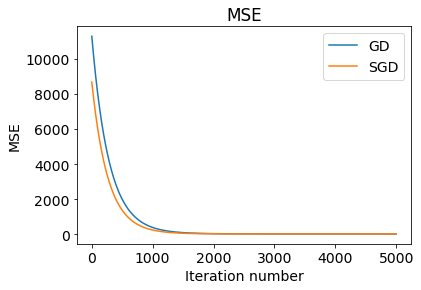

In [6]:
plt.plot(range(len(errors_gd)), errors_gd, label='GD')
plt.plot(range(len(errors_SGD)), errors_SGD, label='SGD')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

Вывод: Стохастический градиентный спуск сходится немного быстрее чем обычный.

#### 2.Модифицировать решение первого задания путем добавления L2 регуляризации и сравнить результаты.

In [7]:
def eval_model_reg2(X, y, iterations, alpha=1e-3, lambda_=1e-2):
    global errors_gd_reg2
    errors_gd_reg2 = []
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        errors_gd_reg2.append(err)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + 2 * lambda_ * w)
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

def eval_SGD_reg2(X, y, iterations, qty_in_batch=1, alpha=1e-3, lambda_=1e-2):
    global errors_SGD_reg2
    errors_SGD_reg2 = []
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp) + 2 * lambda_ * w)
        errors_SGD_reg2.append(err)
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [8]:
eval_model_reg2(X_hw, y_hw, iterations=5000, alpha=1e-3, lambda_=1e-2)

500 [46.16700908 47.16336948] 2028.2290961272229
1000 [67.28441822 64.12339886] 420.6860567654302
1500 [77.09706962 70.15788137] 116.55458345564682
2000 [81.67484812 72.2824228 ] 52.35533546353272
2500 [83.81724304 73.01938041] 36.903256128126806
3000 [84.82240701 73.26957299] 32.58015167976583
3500 [85.29494559 73.35178485] 31.17067311622033
4000 [85.51743868 73.37740303] 30.647034405002955
4500 [85.62232723 73.38464742] 30.433396511461225
5000 [85.67182163 73.38628406] 30.34093237289937


array([85.67182163, 73.38628406])

In [9]:
eval_SGD_reg2(X_hw, y_hw, iterations=5000, alpha=1e-3, lambda_=1e-2)

500 [31.05916846 32.41834198] 1797.0494921777477
1000 [36.30972067 36.76335114] 1416.009746014281
1500 [37.21630212 37.33897011] 1364.8772336046943
2000 [37.37347262 37.41445874] 1357.5081113163899
2500 [37.40080925 37.42421919] 1356.4224687020062
3000 [37.40557619 37.42545564] 1356.2600102174517
3500 [37.40640914 37.42560753] 1356.2353191156392
4000 [37.40655492 37.42562529] 1356.2315060381836
4500 [37.40658047 37.42562719] 1356.2309076400988
5000 [37.40658495 37.42562735] 1356.2308122473041


array([37.40658495, 37.42562735])

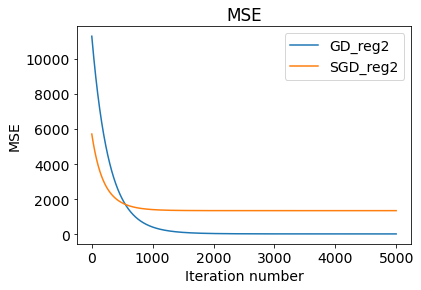

In [10]:
plt.plot(range(len(errors_gd_reg2)), errors_gd_reg2, label='GD_reg2')
plt.plot(range(len(errors_SGD_reg2)), errors_SGD_reg2, label='SGD_reg2')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

Судя по всему L-2 регуляризация сильно влияет на стохастический градиентный спуск, а вот на обычный влияние существенно меньше

#### 3.[*] Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [11]:
def eval_model_reg1(X, y, iterations, alpha=1e-3, lambda_=1e-2):
    global errors_gd_reg1
    errors_gd_reg1 = []
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        errors_gd_reg1.append(err)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + (w / abs(w)))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

def eval_SGD_reg1(X, y, iterations, qty_in_batch=1, alpha=1e-3, lambda_=1e-2):
    global errors_SGD_reg1
    errors_SGD_reg1 = []
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp) + (w / abs(w)))
        errors_SGD_reg1.append(err)
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [12]:
eval_model_reg1(X_hw, y_hw, iterations=5000, alpha=1e-3, lambda_=1e-2)

500 [46.01992379 47.04623405] 2043.803046434594
1000 [67.2808682  64.13423587] 420.58220390207794
1500 [77.2595312  70.27564066] 113.24368772931102
2000 [81.96156614 72.45967979] 49.54763380133101
2500 [84.18424413 73.22494521] 34.91192466188165
3000 [85.23756473 73.48738484] 31.116492388400687
3500 [85.73772381 73.57450005] 29.987122491796598
4000 [85.97559128 73.60192523] 29.60114756922795
4500 [86.08885601 73.60976192] 29.452833781001903
5000 [86.14284074 73.61155221] 29.39085842771086


array([86.14284074, 73.61155221])

In [13]:
eval_SGD_reg1(X_hw, y_hw, iterations=5000, alpha=1e-3, lambda_=1e-2)

500 [11.33630883 15.95809122] 3646.483955403467
1000 [16.35456393 21.79534077] 2972.2331320514413
1500 [18.69324665 23.9176233 ] 2730.1803390695454
2000 [19.78908121 24.68414439] 2638.573144271411
2500 [20.30481391 24.95850867] 2602.887781943133
3000 [20.54838923 25.05549068] 2588.7111703708547
3500 [20.66375038 25.08916526] 2582.984437577323
4000 [20.71850873 25.10055319] 2580.633449418075
4500 [20.74454636 25.10424845] 2579.652504225799
5000 [20.75694431 25.10536567] 2579.2364938909923


array([20.75694431, 25.10536567])

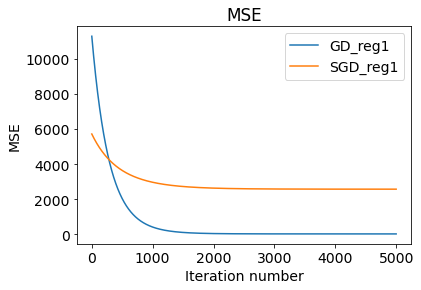

In [14]:
plt.plot(range(len(errors_gd_reg1)), errors_gd_reg1, label='GD_reg1')
plt.plot(range(len(errors_SGD_reg1)), errors_SGD_reg1, label='SGD_reg1')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

Опять, почти не увидел разницы с обычным градиентным спуском, но усилилось влияние на стохастический

#### 4.[*] Построить график изменения весов от числа итераций при GD и SGD (на одном рисунке).

In [15]:
# Метод градиентного спуска
def eval_GD_w(X, y, iterations, alpha=1e-4):
    gd_w1 = []
    gd_w2 = []
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))
        gd_w1.append(w[0])
        gd_w2.append(w[1])
    return gd_w1, gd_w2

# mini-batch GD & SGD
def eval_SGD_w(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    sgd_w1 = []
    sgd_w2 = []
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp))
        sgd_w1.append(w[0])
        sgd_w2.append(w[1])
    return sgd_w1, sgd_w2

In [16]:
sgd_w1, sgd_w2 = eval_SGD_w(X_hw, y_hw, iterations=1000, qty_in_batch=10, alpha=1e-3)

In [17]:
gd_w1, gd_w2 = eval_GD_w(X_hw, y_hw, iterations=1000, alpha=1e-3)

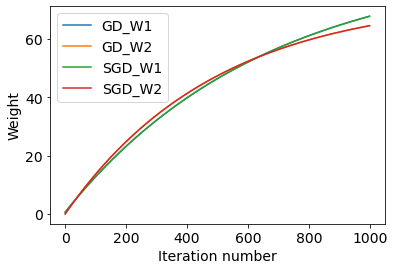

In [18]:
plt.plot(range(len(gd_w1)), gd_w1, label='GD_W1')
plt.plot(range(len(gd_w2)), gd_w2, label='GD_W2')
plt.plot(range(len(sgd_w1)), sgd_w1, label='SGD_W1')
plt.plot(range(len(sgd_w2)), sgd_w2, label='SGD_W2')
plt.title('')
plt.xlabel('Iteration number')
plt.ylabel('Weight')
plt.legend()

Пробовал с разными параметрами, графики совпадают для обоих методов.

#### 5. [*] Построить график изменения весов для L1 и L2 регуляризации от коэффициента регуляризации

За основу возьму стохастический гардиентный спуск

In [19]:
def eval_SGD_reg2_w(X, y, iterations, qty_in_batch=1, alpha=1e-3):
    w1_reg2 = []
    w2_reg2 = []
    lambda_reg2 = []
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for j in range(0, 3):
        lambda_ = 10 ** - j
        for i in range(1, iterations + 1):
            for b in range(n_batch):
                start_ = qty_in_batch * b
                end_ = qty_in_batch * (b + 1)
                X_tmp = X[start_ : end_, :]
                y_tmp = y[start_ : end_]
                y_pred_tmp = np.dot(X_tmp, w)
                err = calc_mse(y_tmp, y_pred_tmp)
                w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp) + 2 * lambda_ * w)
        w1_reg2.append(w[0])
        w2_reg2.append(w[1])
        lambda_reg2.append(lambda_)
    return w1_reg2, w2_reg2, lambda_reg2


def eval_SGD_reg1_w(X, y, iterations, qty_in_batch=1, alpha=1e-3):
    w1_reg1 = []
    w2_reg1 = []
    lambda_reg1 = []
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for j in range(0, 3):
        lambda_ = 10 ** (-j) 
        for i in range(1, iterations + 1):
            for b in range(n_batch):
                start_ = qty_in_batch * b
                end_ = qty_in_batch * (b + 1)
                X_tmp = X[start_ : end_, :]
                y_tmp = y[start_ : end_]
                y_pred_tmp = np.dot(X_tmp, w)
                err = calc_mse(y_tmp, y_pred_tmp)
                w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp) + (w / abs(w)))
        w1_reg1.append(w[0])
        w2_reg1.append(w[1])
        lambda_reg1.append(lambda_)
    return w1_reg1, w2_reg1, lambda_reg1

In [20]:
W1_REG1, W2_REG1, lambda_reg1 = eval_SGD_reg1_w(X_hw, y_hw, 2000, qty_in_batch=70, alpha=1e-3)
W1_REG2, W2_REG2, lambda_reg2 = eval_SGD_reg2_w(X_hw, y_hw, 2000, qty_in_batch=70, alpha=1e-3)

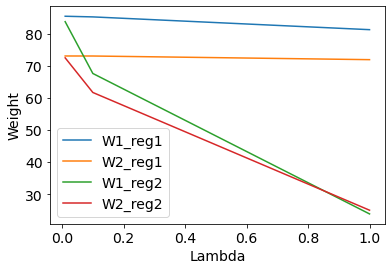

In [22]:
plt.plot(lambda_reg1, W1_REG1, label='W1_reg1')
plt.plot(lambda_reg1, W2_REG1, label='W2_reg1')
plt.plot(lambda_reg2, W1_REG2, label='W1_reg2')
plt.plot(lambda_reg2, W2_REG2, label='W2_reg2')
plt.xlabel('Lambda')
plt.ylabel('Weight')
plt.legend()

По графику очевидно, что l2 регуляризация с ростом штрафует веса намного сильнее, чем l1